In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import PIL.ImageOps
import random
import decimal
import json

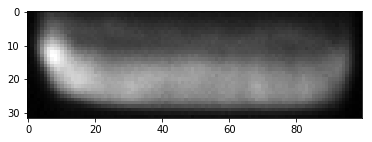

In [2]:
img = Image.open('enriched_long.tif')
#read image
#img_arr = plt.imread("enriched_long.tif")
#print(img_arr)
#print(img_arr.mean(axis=1))
#view image
#plt.imshow(img_arr, cmap="gray")
#plt.show()

imgCropped = img.crop((890,180, 990, 212))  # cropping 3.5kb to 6kb
plt.imshow(np.asarray(imgCropped), cmap="gray")
#plt.imshow(imgCropped)


Length of intensities:  32
{'0': 334.71, '1': 373.01, '2': 421.95, '3': 473.42, '4': 528.64, '5': 582.45, '6': 627.75, '7': 669.68, '8': 705.68, '9': 743.25, '10': 780.91, '11': 839.32, '12': 909.01, '13': 987.9, '14': 1067.06, '15': 1145.54, '16': 1210.75, '17': 1257.7, '18': 1299.97, '19': 1321.09, '20': 1326.44, '21': 1313.5, '22': 1286.06, '23': 1237.13, '24': 1178.12, '25': 1091.79, '26': 971.77, '27': 805.21, '28': 610.98, '29': 420.58, '30': 283.18, '31': 214.61}
Intensities:
334.71,373.01,421.95 ... 420.58,283.18,214.61


Cumulatative Intensities: 
0.012387875862906173,0.02619326433538274,0.041809960043169364 ... 0.9815764072606256,0.9920571179859035,1.0000000000000002


AttributeError: module 'matplotlib.pyplot' has no attribute 'xaxis'

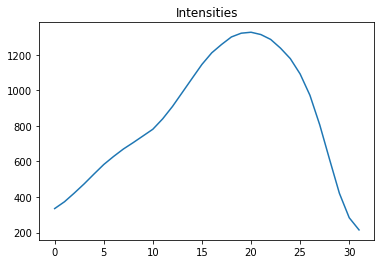

In [14]:

data = np.array(imgCropped, dtype="float64")   # data is a two-dimensional array

graph_intensities = []
intensities = []
cum_proportion = []
intensities=data.mean(axis=1) # get mean by column (axis=1), to get mean by row(axis=0). This is same as doing the for loop below commented
print("Length of intensities: ", len(intensities))
json_intensities=dict()
for data in range(len(intensities)):
    #intensities.append(a.mean())
    json_intensities[str(data)]=intensities[data]

print(json_intensities)

with open("intensities.json", "wt") as jsondata:
    json.dump(json_intensities, jsondata, sort_keys=True, indent=4, separators=(',', ': '))

# get intensities, cumulative intensiteis and cumulative proportions
print("Intensities:")
print(",".join([str(x) for x in intensities[:3]]), "..." , ",".join([str(x) for x in intensities[-3:]]))
total_intensity=sum(intensities)
#print("Total intensity ", total_intensity)
cum_intensities=np.cumsum(intensities)
#print("Cum intensity ", cum_intensities)
proportions=[x/total_intensity for x in intensities]
#print("Proportions", proportions)
cum_proportions=np.cumsum(proportions)
#print("Cum Proportions", cum_proportions)

print("\n\nCumulatative Intensities: ")
print(",".join([str(x) for x in cum_proportions[:3]]),"...", ",".join([str(x) for x in cum_proportions[-3:]]))

#Plot intensities, cumulative intensiteis and cumulative proportions
plt.figure()
plt.title("Intensities")
plt.plot(intensities)
plt.show()

plt.figure()
plt.title("Cumulative Intensities")
plt.plot(cum_intensities)
plt.show()

plt.figure()
plt.title("Cumulative Proportions")
plt.plot(cum_proportions)
plt.show()

max_proportion=max(cum_proportions)
min_proportion=min(cum_proportions)

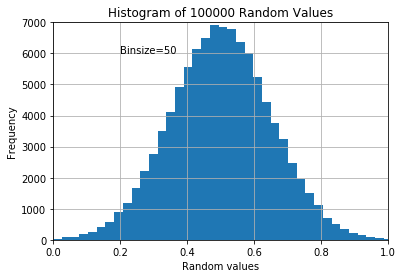

In [7]:

#generate values for total sequences

num_of_seqs=100000

## generate random values in normal distribution
np.random.seed(19680801) ## seed value for reproducibility
mu, sigma = 0.5, 0.15
random_values = mu + sigma * np.random.randn(100000)

# the histogram of the data
plt.hist(random_values, 50)

plt.xlabel('Random values')
plt.ylabel('Frequency')
plt.title('Histogram of ' + str(num_of_seqs) + ' Random Values')
plt.axis([0,1,0, 7000])
plt.grid(True)
plt.text(0.2,6000, r'Binsize=50')
plt.show()



Each point base pairs:  78.125


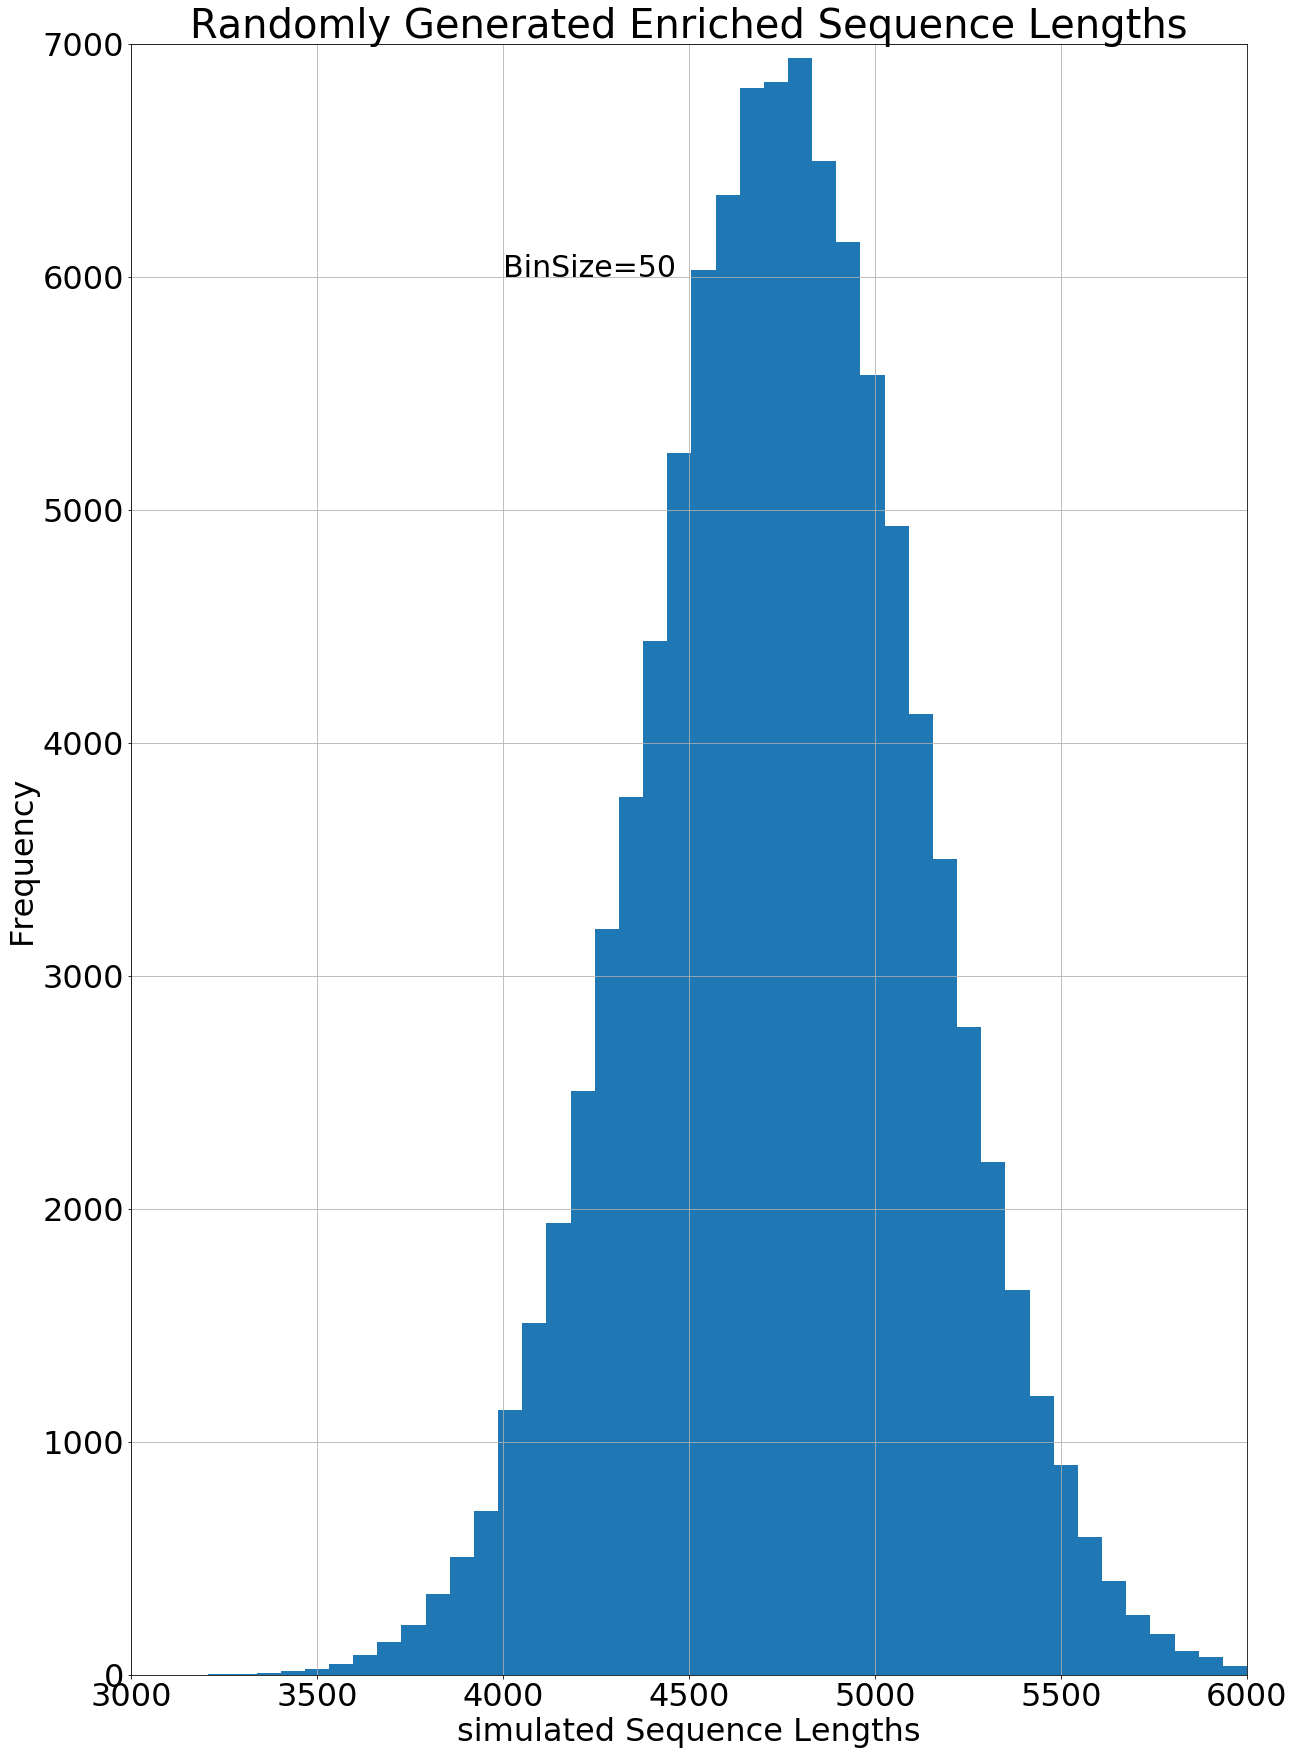

In [11]:
# get each point in x-axis in the plot 
unitlength = (6000 - 3500)/32

print("Each point base pairs: ", each_point)
# count=0
# for count in range(num_of_seqs):
#     randomvalue=float(random.random())
#     if randomvalue >= min_proportion and randomvalue <=max_proportion:
#         random_values.append(randomvalue)
#         count+=1
        
## convert the random values to sequence lengths
seq_lengths=[round(6000 - x*32*unitlength, 0) for x in random_values]
#print(",".join([str(x) for x in random_values[:3]]), "..." , ",".join([str(x) for x in random_values[-3:]]))
#print(",".join([str(x) for x in seq_lengths[:3]]), "..." , ",".join([str(x) for x in seq_lengths[-3:]]))


## get seq length data into array 
seq_length_data=dict()
for data in range(len(seq_lengths)):
    seq_length_data[str(data)]=seq_lengths[data]

#print(seq_length_data)

## save sequence lengths as json in a file
with open("results/seq_lengths.json", "wt") as seqlengthjson:
    json.dump(seq_length_data, seqlengthjson, sort_keys=True, indent=4, separators=(',', ': '))

seq_lengths=np.array(seq_lengths)
fig=plt.figure(figsize=(20,30))
plt.title("Randomly Generated Enriched Sequence Lengths", fontsize=40)
plt.xlabel("simulated Sequence Lengths", fontsize=32)
plt.ylabel("Frequency", fontsize=32)
plt.tick_params(which='both', labelsize=32.00)
plt.hist(seq_lengths, 50)
plt.text(4000, 6000, r'BinSize=50', fontsize=30)
plt.axis([3000,6000, 0, 7000])
plt.grid(True)
plt.show()

In [6]:
## read the reference sequence and store the sequences in a variable

refseq=open('/mnt/HPC_HOME/workarea/assembly_comparison/data/PGSC_DM_v3_scaffolds.fasta')
from Bio import SeqIO
refsequences=[]

for record in SeqIO.parse(refseq, 'fasta'):
    sequence=str(record.seq)
    refsequences.append(sequence)

## Now all the reference sequences are in an array
total_sequences = len(refsequences)
counter=1
print(seq_lengths)
for length in seq_lengths:
    length=int(length)
    sequence_added=False
    while not sequence_added:
        sequence_number = np.random.randint(total_sequences) ## last value is exclusive in randint(), +1 makes the last value inclusive for us
        #print("random seq number", sequence_number)
        #print(len(refsequences[sequence_number]), length)
        if len(refsequences[sequence_number]) < length:
            #print("Smaller in length", len(refsequences[sequence_number]))
            continue
        else:
            #chosen sequence length greater than the length we want, so get random start number to get subseq
            #print(len(refsequences[sequence_number]), length)
            while True:
                random_start_position = np.random.randint(len(refsequences[sequence_number]))
                if len(refsequences[sequence_number]) - random_start_position < length:
                    #print("Start position is too low", random_start_position)
                    continue
                else:
                    #print("Start position", random_start_position)
                    print(">randseq" + str(counter))
                    #print(len(refsequences[sequence_number][random_start_position:random_start_position + length]))
                    randomsequence=refsequences[sequence_number][random_start_position:random_start_position + length]
                    os.system("echo " + randomsequence + " | blastn -db data/renseq-bait-library-sequences.fasta -outfmt 6 -perc_identity 83.0 > results/randomsequence_blasthits.txt")
                    counter+=1
                    sequence_added = True
                    break


    

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/HPC_HOME/workarea/assembly_comparison/data/PGSC_DM_v3_scaffolds.fasta'